In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [4]:
scan = set(['ipsweep', 'portsweep', 'nmap', 'satan'])
dos = set(['neptune', 'smurf', 'pod', 'teardrop', 'land'])
access = set(['guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezclient', 'warezmaster'])
exploit = set(['buffer_overflow', 'loadmodule', 'rootkit', 'perl'])
backdoor = set(['back','spy'])

df['attack_category'] = None

for i in range(len(df)):
  attk = df.loc[i,'attack']
  if attk in scan:
    df.loc[i,'attack_category'] = 'scan'
  elif attk in dos:
    df.loc[i,'attack_category'] = 'dos'
  elif attk in access:
    df.loc[i,'attack_category'] = 'access'
  elif attk in exploit:
    df.loc[i,'attack_category'] = 'exploit'
  elif attk in backdoor:
    df.loc[i,'attack_category'] = 'backdoor'
  else:
    df.loc[i,'attack_category'] = 'normal'

In [5]:
# land, wrongfragment,urgent, numfailedlogins,loggedin,rootshell,suattempted,numshells,ishostlogin,isguestlogin
df['land'] = df['land'].astype('category')
df['wrongfragment'] = df['wrongfragment'].astype('category')
df['urgent'] = df['urgent'].astype('category')
#df['numfailedlogins'] = df['numfailedlogins'].astype('category')
df['loggedin'] = df['loggedin'].astype('category')
df['rootshell'] = df['rootshell'].astype('category')
df['suattempted'] = df['suattempted'].astype('category')
df['numshells'] = df['numshells'].astype('category')
df['ishostlogin'] = df['ishostlogin'].astype('category')
df['isguestlogin'] = df['isguestlogin'].astype('category')

In [6]:
# Host count of flags
df['serror'] = df['count']*df['serrorrate']
df['rerror'] = df['count']*df['rerrorrate']

# Host srv count of flags
df['srvserror'] = df['srvcount']*df['srvrerrorrate']
df['srvrerror'] = df['srvcount']*df['srvserrorrate']

df['samesrv'] = df['count']*df['samesrvrate']
df['diffsrv'] = df['count']*df['diffsrvrate']

# Host count of flags
df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# Host srv count of flags
df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

In [7]:
from sklearn.model_selection import train_test_split

all_attacks = df['attack'].unique()
np.random.seed(42)

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train_data = pd.DataFrame()
test_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks:
    category_data = df[df['attack'] == category]

    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)

    elif len(category_data) == 2:
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_data = pd.concat([test_data,category_data])
        noise_data = category_data[category_data.index.isin(chooser)].copy()
        noise_data['count'] += 0.0001
        train_data = pd.concat([train_data,noise_data],axis=0)
        continue

    elif len(category_data) > 2 and len(category_data) <= 5:
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])

        noise_data = train_selection.copy()
        noise_data['count'] += 0.0001
        train_data = pd.concat([train_data,noise_data],axis=0)
        continue
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test_data = pd.concat([test_data,test_selection])
        train_data = pd.concat([train_data,train_selection])
        continue
    

    else:
        print(category)
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train_data = pd.concat([train_data,category_train])
    test_data = pd.concat([test_data,category_test])

buffer_overflow
imap
warezmaster
land


In [8]:
X_train = train_data.drop(['attack','is_attack','attack_category'],axis=1)
y_train = train_data['is_attack']
X_test = test_data.drop(['attack','is_attack','attack_category'],axis=1)
y_test = test_data['is_attack']

In [9]:
# pd.concat([train_data['attack'].value_counts(),test_data['attack'].value_counts(),df['attack'].value_counts()],axis=1)

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag','land','wrongfragment','urgent','loggedin','rootshell','suattempted','numshells',
                       'ishostlogin','isguestlogin']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [11]:
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,class_weight='balanced',n_estimators=100,
                            min_samples_split= 7,
                            max_features= 'sqrt',
                            max_depth= 30)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

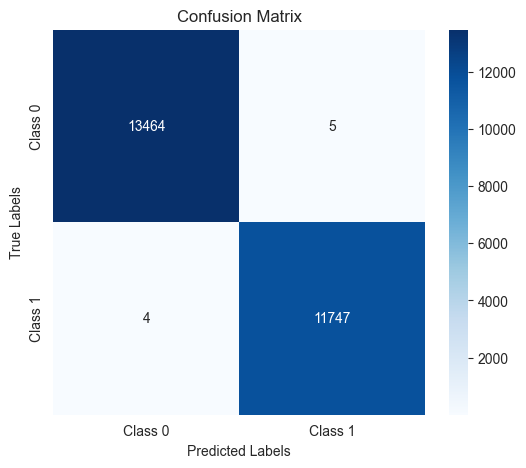

In [13]:
from sklearn.metrics import confusion_matrix


cmrf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cmrf, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
# from sklearn.model_selection import RandomizedSearchCV


# param_dist = {
#     'n_estimators': [50,100, 150,200,500],
#     'max_depth': [10, 20,30,40,50],
#     'min_samples_split': [2, 5, 7,10],
#     'max_features': ['sqrt', 'log2', None]
# }

# rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')

# random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
#                                    n_iter=500, cv=5, scoring='accuracy', 
#                                    n_jobs=-1, random_state=42)
# random_search.fit(X_train, y_train)
# random_search.best_params_


In [15]:
# best_clf = random_search.best_estimator_
# y_pred_rf_best= best_clf.predict(X_test)

# cmbest = confusion_matrix(y_test, y_pred_rf_best)

# plt.figure(figsize=(6, 5))
# sns.heatmap(cmbest, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix')
# plt.show()

In [16]:
y_pred_df = pd.DataFrame(y_pred_rf,index=y_test.index)
y_pred_df.isna().sum()

0    0
dtype: int64

In [17]:
combined_pred = pd.concat([y_test,y_pred_df],axis=1)
combined_pred.columns = ['is_attack','is_attack_pred']
predicted_probabilities = rf.predict_proba(X_test)
combined_pred['predict_prob'] = predicted_probabilities[:, 1]
combined_pred.head()

,is_attack,is_attack_pred,predict_prob
18091,0,0,0.0
29741,0,0,0.0
76709,0,0,0.0
91928,0,0,0.0
39962,0,0,0.0


In [18]:
combined_pred_eq = combined_pred[combined_pred['is_attack'] == combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred[combined_pred['is_attack'] != combined_pred['is_attack_pred']]
combined_pred_uneq = combined_pred_uneq[combined_pred_uneq['is_attack'] == 1]
combined_pred = pd.concat([combined_pred_eq,combined_pred_uneq],axis=0)
combined_pred.shape

(25215, 3)

In [19]:
op = pd.merge(X_test,combined_pred,left_index=True,right_index=True)
op = pd.merge(op,df[['attack_category','attack']],left_index=True,right_index=True)
op.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,is_attack,is_attack_pred,predict_prob,attack_category,attack
18091,-0.109309,2.223235,-1.176116,0.751241,-0.007738,-0.005282,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.810610,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,0.182985,2.168302,-0.637513,-0.632046,-0.374379,-0.374538,0.770819,-0.349276,-0.336052,0.736043,1.258272,1.066418,-0.438896,-0.479525,-0.288572,-0.639305,-0.624797,-0.387849,-0.376426,-0.656877,-0.54098,-0.25174,-0.242118,-0.503688,1.161676,-0.196050,-0.625478,-0.343028,-0.173354,-0.418799,1.304679,-0.292249,0,0,0.0,normal,normal
29741,-0.109309,-0.124695,-0.442331,0.751241,-0.007699,-0.002285,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,1.233638,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.585898,-0.148033,-0.637513,-0.632046,-0.374379,-0.374538,0.770819,-0.349276,-0.374561,0.736043,1.258272,1.066418,-0.438896,-0.479525,-0.288572,-0.639305,-0.624797,-0.387849,-0.376426,0.654508,-0.54098,-0.25174,-0.242118,-0.503688,-0.099830,-0.196050,-0.625478,-0.343028,-0.173354,-0.418799,1.304679,-0.292249,0,0,0.0,normal,normal
76709,-0.109309,2.223235,-1.176116,0.751241,-0.007741,-0.005290,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.810610,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.725696,-0.368636,-0.637513,-0.632046,-0.374379,-0.374538,0.770819,-0.349276,-0.374561,-1.379002,0.734382,1.066418,-0.438896,2.765719,-0.199834,-0.639305,-0.624797,-0.387849,-0.376426,0.654508,-0.54098,-0.25174,-0.242118,-0.503688,-0.329195,-0.196050,-0.625478,-0.343028,-0.173354,-0.418799,0.800651,-0.292249,0,0,0.0,normal,normal
91928,-0.109309,2.223235,1.086386,0.751241,-0.007729,-0.005277,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.810610,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.673272,-0.368636,-0.637513,-0.632046,-0.374379,-0.374538,-1.185450,1.260413,-0.374561,0.736043,1.204076,1.021859,-0.385955,-0.479525,-0.288572,-0.639305,-0.624797,-0.387849,-0.376426,-0.656877,-0.54098,-0.25174,-0.242118,-0.503688,-0.329482,-0.155957,-0.625478,-0.343028,-0.173354,-0.418799,1.209261,0.212256,0,0,0.0,normal,normal
39962,-0.098888,2.223235,-1.176116,0.751241,-0.007741,-0.005303,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.810610,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.708221,-0.313486,-0.637513,-0.632046,-0.374379,-0.374538,-0.753251,3.369662,1.165788,-1.207784,-0.755994,-0.002990,-0.174189,-0.414620,-0.288572,-0.639305,-0.624797,-0.387849,-0.376426,0.654508,-0.54098,-0.25174,-0.242118,-0.503688,-0.329339,-0.156352,-0.625478,-0.343028,-0.173354,-0.418799,-0.766703,0.031931,0,0,0.0,normal,normal


In [20]:
attacks = op[op['is_attack_pred'] == 1].copy()
attacks['attack_category'].value_counts()

attack_category
dos         8998
scan        2333
access       206
backdoor     193
exploit       17
Name: count, dtype: int64

In [21]:
all_attacks1 = attacks['attack'].unique()

# Step 2: Create a stratified split ensuring that each category is in the test set at least once
train1_data = pd.DataFrame()
test1_data = pd.DataFrame()

# Split the data by each attack category and ensure they appear in test
for category in all_attacks1:
    # Get data for the current category
    category_data = attacks[attacks['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) > 30:
        category_train, category_test = train_test_split(category_data, test_size=0.2,random_state=42)
    elif len(category_data) == 1:
        test1_data = pd.concat([test1_data,category_data])
        noise_data = category_data.copy()
        noise_data['count'] += 0.0001
        #display(category_data)
        #display(noise_data)
        train1_data = pd.concat([train1_data,noise_data],axis=0)
        # print(train1_data[train1_data['attack'] == category].shape)
        continue
    elif len(category_data) > 1 and len(category_data) <= 5:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,1)
        test_selection = category_data[~category_data.index.isin(chooser)]
        train_selection = category_data[category_data.index.isin(chooser)]

        test1_data = pd.concat([test1_data,test_selection])
        train1_data = pd.concat([train1_data,train_selection])

        noise_data = train_selection.copy()
        noise_data['count'] += 0.0001
        train1_data = pd.concat([train1_data,noise_data],axis=0)
    
    elif len(category_data) > 5 and len(category_data) <= 10:
        #print('noise to',category)
        all_idx = category_data.index
        chooser = np.random.choice(all_idx,3)
        test_selection = category_data[category_data.index.isin(chooser)]
        train_selection = category_data[~category_data.index.isin(chooser)]

        test1_data = pd.concat([test1_data,test_selection])
        train1_data = pd.concat([train1_data,train_selection])
    

    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    train1_data = pd.concat([train1_data,category_train])
    test1_data = pd.concat([test1_data,category_test])

In [22]:
X1_train = train1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_train = train1_data['attack_category']
X1_test = test1_data.drop(['attack','is_attack','attack_category'],axis=1)
y1_test = test1_data['attack_category']

In [23]:
X1_train.drop(['is_attack_pred', 'predict_prob'],axis=1,inplace=True)
X1_test.drop(['is_attack_pred', 'predict_prob'],axis=1,inplace=True)

In [24]:
target_encoder = LabelEncoder()
y1_train_encoded = target_encoder.fit_transform(y1_train)
y1_test_encoded = target_encoder.transform(y1_test)

In [25]:
target_classes = [target_encoder.classes_[i] for i in range(len(target_encoder.classes_))]
target_classes

['access', 'backdoor', 'dos', 'exploit', 'scan']

In [26]:
train1_data['attack_category'].value_counts()

attack_category
dos         7195
scan        1865
backdoor    1837
access       160
exploit       12
Name: count, dtype: int64

In [27]:
rf2 = RandomForestClassifier(random_state=42,class_weight='balanced',
                             n_estimators= 200,
                            min_samples_split=2,
                            max_features='log2',
                            max_depth=None)
rf2.fit(X1_train,y1_train_encoded)
y_pred1 = rf2.predict(X1_test)

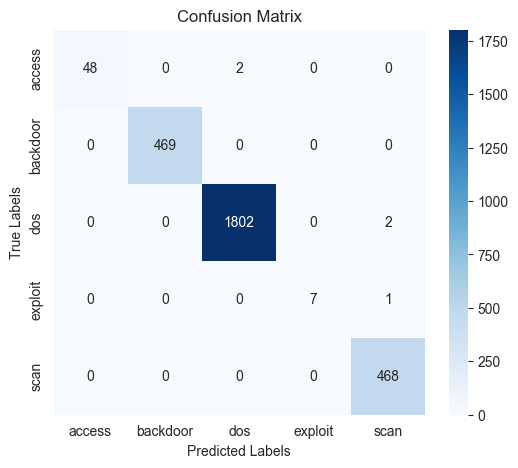

In [28]:
cm1 = confusion_matrix(y1_test_encoded, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'n_estimators': [50,100, 150,200,500],
    'max_depth': [10, 20,30,40,50,60],
    'min_samples_split': [2, 5, 7,10],
    'max_features': ['sqrt', 'log2', None]
}

rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, 
                                   n_iter=500, cv=5, scoring='accuracy', 
                                   n_jobs=-1, random_state=42)
random_search.fit(X1_train,y1_train_encoded)
random_search.best_params_

d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 360 is smaller than n_iter=500. Running 360 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 50,
 'min_samples_split': 10,
 'max_features': 'log2',
 'max_depth': 20}

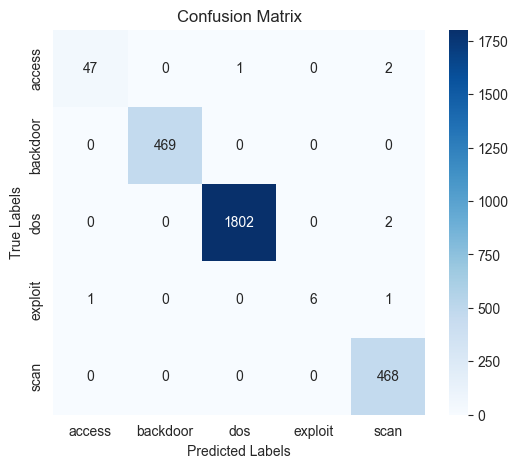

In [49]:
best_clf = random_search.best_estimator_
y_pred22= best_clf.predict(X1_test)

cmbest = confusion_matrix(y1_test_encoded, y_pred22)

plt.figure(figsize=(6, 5))
sns.heatmap(cmbest, annot=True, fmt='d', cmap='Blues', xticklabels=target_classes, yticklabels=target_classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y1_test_encoded, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       1.00      1.00      1.00       469
           2       1.00      1.00      1.00      1804
           3       1.00      0.88      0.93         8
           4       0.99      1.00      1.00       468

    accuracy                           1.00      2799
   macro avg       1.00      0.97      0.98      2799
weighted avg       1.00      1.00      1.00      2799



In [31]:
y1_pred_df = pd.DataFrame(y_pred1,index=y1_test.index)
y1_pred_df.isna().sum()

0    0
dtype: int64

In [32]:
combined_pred1 = pd.concat([y1_test,y1_pred_df],axis=1)
combined_pred1.columns = ['attack_category','attack_category_pred']
predicted_probabilities1 = rf2.predict_proba(X1_test)
combined_pred1['predict_prob'] = predicted_probabilities1[:, 1]

In [33]:
ocategory = dict()
for i in range(len(target_encoder.classes_)):
    ocategory[i] = target_encoder.classes_[i]
ocategory

{0: 'access', 1: 'backdoor', 2: 'dos', 3: 'exploit', 4: 'scan'}

In [34]:
combined_pred1['attack_category_pred'] = combined_pred1['attack_category_pred'].map(ocategory)

In [35]:
combined_pred1 = combined_pred1[combined_pred1['attack_category'] == combined_pred1['attack_category_pred']]
combined_pred1.shape

(2794, 3)

In [56]:
combined_pred1['attack_category'].value_counts()

attack_category
dos         1802
backdoor     469
scan         468
access        48
exploit        7
Name: count, dtype: int64

In [59]:
op1 = pd.merge(X1_test,combined_pred1,left_index=True,right_index=True)
op1 = pd.merge(op1,df['attack'],left_index=True,right_index=True)
op1.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category,attack_category_pred,predict_prob
92447,-0.109309,-0.124695,-1.359562,-1.850971,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,1.030505,-0.368636,-0.637513,-0.632046,2.746164,2.713659,-1.503912,0.039269,-0.374561,0.736043,-1.036004,-1.161515,-0.015365,-0.479525,-0.288572,-0.639305,-0.624797,2.873439,2.754359,0.217380,-0.540980,2.927955,0.109285,-0.503688,-0.343530,0.083217,-0.625478,3.321295,-0.138182,-0.418799,-0.911307,-0.276040,dos,dos,0.000
6373,-0.109309,-0.124695,0.108007,-2.222715,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,1.467371,-0.203184,-0.637513,-0.632046,2.746164,2.713659,-1.390176,0.039269,-0.374561,0.736043,-0.927613,-1.050118,-0.068307,-0.479525,-0.288572,-0.639305,-0.624797,2.873439,2.754359,-0.219749,-0.540980,3.715009,4.326129,-0.503688,-0.162906,0.152343,-0.625478,3.321295,0.283881,-0.418799,-0.905658,-0.107872,dos,dos,0.000
112415,-0.109309,-0.124695,-0.442331,-0.735737,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.594636,-0.148033,1.601997,1.470742,-0.374379,-0.189247,0.770819,-0.349276,0.087544,-1.671079,-0.900515,1.066418,-0.438896,-0.284810,-0.288572,1.609084,1.618983,-0.387849,-0.376426,-2.405390,-0.357921,-0.251740,0.116313,2.138320,-0.114166,-0.196050,-0.482343,-0.343028,-0.173354,1.175293,-0.772265,-0.292249,dos,dos,0.015
15105,-0.109309,-0.124695,-0.686926,-0.735737,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.428627,-0.285910,1.534812,1.604962,-0.280762,-0.374538,-1.048966,0.427815,-0.374561,0.736043,-0.792124,-0.916442,-0.174189,-0.479525,-0.288572,1.609084,1.618983,-0.387849,-0.376426,-0.656877,-0.152552,-0.235211,-0.242118,0.653637,-0.243183,-0.099274,1.655734,-0.343028,-0.173354,2.370862,-0.884541,-0.008591,dos,dos,0.000
87189,-0.109309,-0.124695,1.086386,-0.735737,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,1.240201,-0.203184,1.601997,1.604962,-0.374379,-0.374538,-1.367428,-0.016237,-0.374561,0.736043,-1.008906,-1.116956,-0.015365,-0.479525,-0.288572,1.609084,1.618983,-0.387849,-0.376426,0.654508,2.044726,-0.251740,-0.242118,1.645630,-0.149144,0.071762,1.655734,-0.343028,-0.173354,-0.020276,-0.910612,-0.227413,dos,dos,0.000


In [37]:
final = op1.drop(['attack_category','predict_prob'],axis=1)
final.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag,serror,rerror,srvserror,srvrerror,samesrv,diffsrv,dsthostserror,dsthostrerror,dsthostsrvserror,dsthostsrvrerror,dsthostsamesrv,dsthostdiffsrv,attack_category_pred,attack
92447,-0.109309,-0.124695,-1.359562,-1.850971,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,1.030505,-0.368636,-0.637513,-0.632046,2.746164,2.713659,-1.503912,0.039269,-0.374561,0.736043,-1.036004,-1.161515,-0.015365,-0.479525,-0.288572,-0.639305,-0.624797,2.873439,2.754359,0.217380,-0.540980,2.927955,0.109285,-0.503688,-0.343530,0.083217,-0.625478,3.321295,-0.138182,-0.418799,-0.911307,-0.276040,dos,neptune
6373,-0.109309,-0.124695,0.108007,-2.222715,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,1.467371,-0.203184,-0.637513,-0.632046,2.746164,2.713659,-1.390176,0.039269,-0.374561,0.736043,-0.927613,-1.050118,-0.068307,-0.479525,-0.288572,-0.639305,-0.624797,2.873439,2.754359,-0.219749,-0.540980,3.715009,4.326129,-0.503688,-0.162906,0.152343,-0.625478,3.321295,0.283881,-0.418799,-0.905658,-0.107872,dos,neptune
112415,-0.109309,-0.124695,-0.442331,-0.735737,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.594636,-0.148033,1.601997,1.470742,-0.374379,-0.189247,0.770819,-0.349276,0.087544,-1.671079,-0.900515,1.066418,-0.438896,-0.284810,-0.288572,1.609084,1.618983,-0.387849,-0.376426,-2.405390,-0.357921,-0.251740,0.116313,2.138320,-0.114166,-0.196050,-0.482343,-0.343028,-0.173354,1.175293,-0.772265,-0.292249,dos,neptune
15105,-0.109309,-0.124695,-0.686926,-0.735737,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,-0.428627,-0.285910,1.534812,1.604962,-0.280762,-0.374538,-1.048966,0.427815,-0.374561,0.736043,-0.792124,-0.916442,-0.174189,-0.479525,-0.288572,1.609084,1.618983,-0.387849,-0.376426,-0.656877,-0.152552,-0.235211,-0.242118,0.653637,-0.243183,-0.099274,1.655734,-0.343028,-0.173354,2.370862,-0.884541,-0.008591,dos,neptune
87189,-0.109309,-0.124695,1.086386,-0.735737,-0.007746,-0.00531,-0.013734,-0.091207,-0.007426,-0.095657,-0.026347,-0.81061,-0.021129,-0.036764,-0.025575,-0.021314,-0.026238,-0.018192,-0.040346,0.0,-0.00315,-0.09777,1.240201,-0.203184,1.601997,1.604962,-0.374379,-0.374538,-1.367428,-0.016237,-0.374561,0.736043,-1.008906,-1.116956,-0.015365,-0.479525,-0.288572,1.609084,1.618983,-0.387849,-0.376426,0.654508,2.044726,-0.251740,-0.242118,1.645630,-0.149144,0.071762,1.655734,-0.343028,-0.173354,-0.020276,-0.910612,-0.227413,dos,neptune


In [55]:
final['attack'].value_counts()

attack
back               5616
neptune            1648
satan               146
ipsweep             144
portsweep           118
smurf               106
nmap                 60
warezclient          36
teardrop             35
pod                   9
land                  4
guess_passwd          3
buffer_overflow       3
warezmaster           3
loadmodule            2
phf                   2
multihop              2
ftp_write             1
rootkit               1
imap                  1
spy                   1
perl                  1
Name: count, dtype: int64

In [38]:
dos_data = final[final['attack_category_pred'] == 'dos'].copy()
dos_data.drop('attack_category_pred',axis=1,inplace=True)

scan_data = final[final['attack_category_pred'] == 'scan'].copy()
scan_data.drop('attack_category_pred',axis=1,inplace=True)

backdoor_data = final[final['attack_category_pred'] == 'backdoor'].copy()
backdoor_data.drop('attack_category_pred',axis=1,inplace=True)

access_data = final[final['attack_category_pred'] == 'access'].copy()
access_data.drop('attack_category_pred',axis=1,inplace=True)

exploit_data = final[final['attack_category_pred'] == 'exploit'].copy()
exploit_data.drop('attack_category_pred',axis=1,inplace=True)

In [39]:
dos_train = pd.DataFrame()
dos_test = pd.DataFrame()

for category in dos_data['attack'].unique():
    # Get data for the current category
    category_data = dos_data[dos_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        dos_train = pd.concat([dos_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    dos_train = pd.concat([dos_train,category_train])
    dos_test = pd.concat([dos_test,category_test])

dosxtrain = dos_train.drop(['attack'],axis=1)
dosytrain = dos_train['attack']
dosxtest = dos_test.drop(['attack'],axis=1)
dosytest = dos_test['attack']

In [40]:
scan_train = pd.DataFrame()
scan_test = pd.DataFrame()

for category in scan_data['attack'].unique():
    # Get data for the current category
    category_data = scan_data[scan_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        scan_train = pd.concat([scan_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    scan_train = pd.concat([scan_train,category_train])
    scan_test = pd.concat([scan_test,category_test])

scanxtrain = scan_train.drop(['attack'],axis=1)
scanytrain = scan_train['attack']
scanxtest = scan_test.drop(['attack'],axis=1)
scanytest = scan_test['attack']

In [41]:
access_train = pd.DataFrame()
access_test = pd.DataFrame()

for category in access_data['attack'].unique():
    # Get data for the current category
    category_data = access_data[access_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        access_train = pd.concat([access_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    access_train = pd.concat([access_train,category_train])
    access_test = pd.concat([access_test,category_test])

accessxtrain = access_train.drop(['attack'],axis=1)
accessytrain = access_train['attack']
accessxtest = access_test.drop(['attack'],axis=1)
accessytest = access_test['attack']

In [42]:
backdoor_train = pd.DataFrame()
backdoor_test = pd.DataFrame()

for category in backdoor_data['attack'].unique():
    # Get data for the current category
    category_data = backdoor_data[backdoor_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        backdoor_train = pd.concat([backdoor_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    backdoor_train = pd.concat([backdoor_train,category_train])
    backdoor_test = pd.concat([backdoor_test,category_test])

backdoorxtrain = backdoor_train.drop(['attack'],axis=1)
backdoorytrain = backdoor_train['attack']
backdoorxtest = backdoor_test.drop(['attack'],axis=1)
backdoorytest = backdoor_test['attack']

In [43]:
exploit_train = pd.DataFrame()
exploit_test = pd.DataFrame()

for category in exploit_data['attack'].unique():
    # Get data for the current category
    category_data = exploit_data[exploit_data['attack'] == category]
    #print(category)
    # Split into train and test, ensuring each category appears in test
    if len(category_data) == 1:
        exploit_train = pd.concat([exploit_train,category_data])
        continue
    else:
        category_train, category_test = train_test_split(category_data, test_size=0.3,random_state=42)
    
    # Append to the train and test sets
    exploit_train = pd.concat([exploit_train,category_train])
    exploit_test = pd.concat([exploit_test,category_test])

exploitxtrain = exploit_train.drop(['attack'],axis=1)
exploitytrain = exploit_train['attack']
exploitxtest = exploit_test.drop(['attack'],axis=1)
exploitytest = exploit_test['attack']

In [44]:
dos_encoder = LabelEncoder()
dosytrain = dos_encoder.fit_transform(dosytrain)
dosytest = dos_encoder.transform(dosytest)

scan_encoder = LabelEncoder()
scanytrain = scan_encoder.fit_transform(scanytrain)
scanytest = scan_encoder.transform(scanytest)

access_encoder = LabelEncoder()
accessytrain = access_encoder.fit_transform(accessytrain)
accessytest = access_encoder.transform(accessytest)

backdoor_encoder = LabelEncoder()
backytrain = backdoor_encoder.fit_transform(backdoorytrain)
backytest = backdoor_encoder.transform(backdoorytest)

exploit_encoder = LabelEncoder()
exploitytrain= exploit_encoder.fit_transform(exploitytrain)
exploitytest = exploit_encoder.transform(exploitytest)

In [45]:
rfdos = RandomForestClassifier(class_weight='balanced',random_state=42)
rfdos.fit(dosxtrain, dosytrain)
y_pred_dos= rfdos.predict(dosxtest)

rfscan = RandomForestClassifier(class_weight='balanced',random_state=42)
rfscan.fit(scanxtrain, scanytrain)
y_pred_scan= rfscan.predict(scanxtest)

rfback = RandomForestClassifier(class_weight='balanced',random_state=42)
rfback.fit(backdoorxtrain, backdoorytrain)
y_pred_back = rfback.predict(backdoorxtest)

rfaccess = RandomForestClassifier(class_weight='balanced',random_state=42)
rfaccess.fit(accessxtrain, accessytrain)
y_pred_access= rfaccess.predict(accessxtest)

rfexploit = RandomForestClassifier(class_weight='balanced',random_state=42)
rfexploit.fit(exploitxtrain, exploitytrain)
y_pred_exploit = rfexploit.predict(exploitxtest)

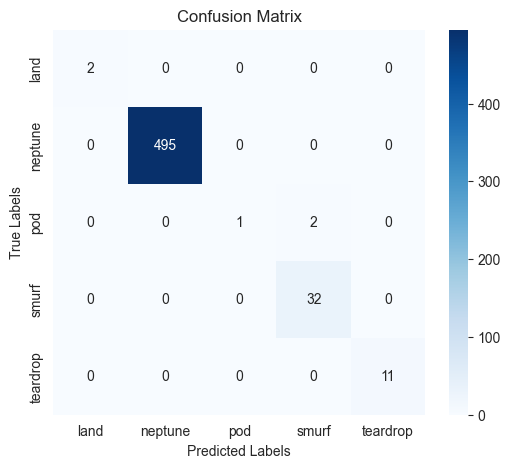

In [46]:
cmdos = confusion_matrix(dosytest, y_pred_dos)
dos_labels = [dos_encoder.classes_[i] for i in range(len(np.unique(dosytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmdos, annot=True, fmt='d', cmap='Blues',xticklabels=dos_labels, yticklabels=dos_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
print(classification_report(dosytest, y_pred_dos,target_names=dos_labels))

              precision    recall  f1-score   support

        land       1.00      1.00      1.00         2
     neptune       1.00      1.00      1.00       495
         pod       1.00      0.33      0.50         3
       smurf       0.94      1.00      0.97        32
    teardrop       1.00      1.00      1.00        11

    accuracy                           1.00       543
   macro avg       0.99      0.87      0.89       543
weighted avg       1.00      1.00      1.00       543



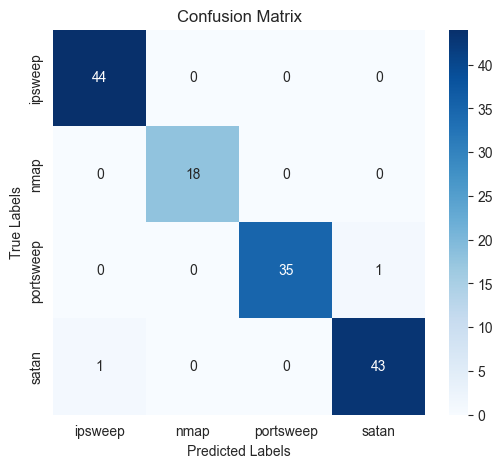

In [50]:
cmscan = confusion_matrix(scanytest, y_pred_scan)
scan_labels = [scan_encoder.classes_[i] for i in range(len(np.unique(scanytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmscan, annot=True, fmt='d', cmap='Blues',xticklabels=scan_labels, yticklabels=scan_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(classification_report(scanytest, y_pred_scan,target_names=scan_labels))

              precision    recall  f1-score   support

     ipsweep       0.98      1.00      0.99        44
        nmap       1.00      1.00      1.00        18
   portsweep       1.00      0.97      0.99        36
       satan       0.98      0.98      0.98        44

    accuracy                           0.99       142
   macro avg       0.99      0.99      0.99       142
weighted avg       0.99      0.99      0.99       142



d:\Scaler\end_to_end\Donor_Choose\project\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


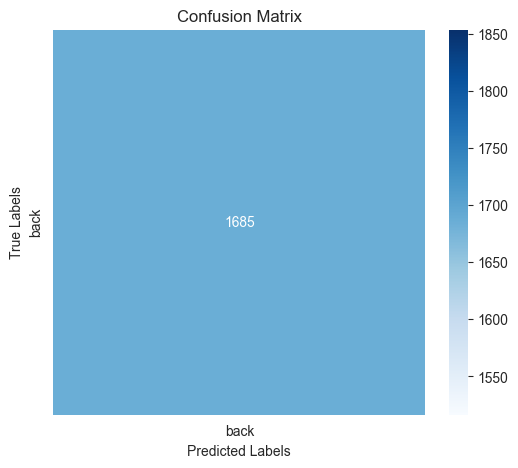

In [52]:
cmsback = confusion_matrix(backdoorytest, y_pred_back)
back_labels = [backdoor_encoder.classes_[i] for i in range(len(np.unique(backdoorytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmsback, annot=True, fmt='d', cmap='Blues',xticklabels=back_labels, yticklabels=back_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(classification_report(backdoorytest, y_pred_back,target_names=back_labels))

              precision    recall  f1-score   support

        back       1.00      1.00      1.00      1685

    accuracy                           1.00      1685
   macro avg       1.00      1.00      1.00      1685
weighted avg       1.00      1.00      1.00      1685



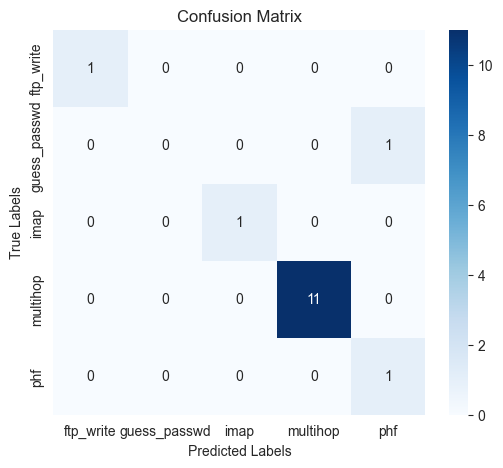

In [54]:
cmaccess = confusion_matrix(accessytest, y_pred_access)
access_labels = [access_encoder.classes_[i] for i in range(len(np.unique(accessytest)))]

plt.figure(figsize=(6, 5))
sns.heatmap(cmaccess, annot=True, fmt='d', cmap='Blues',xticklabels=access_labels,yticklabels=access_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()